# Car Price Prediction Using Multiple Linear Regression

## 1. Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## 2. Import Dataset

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns',35)

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 3. Data Overview

In [4]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum())
print ("\nUnique values :  \n",data.nunique())
print ("\nData Types :  \n",data.dtypes)

Rows     :  205
Columns  :  26

Features : 
 ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Missing values :   car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Uniq

## 4. PRE PROCESSING

In [5]:
data.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## 4.1 Drivewheel

In [6]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Change 4wd into fwd

In [7]:
data['drivewheel']  = data['drivewheel'].replace({'4wd' : 'fwd'})

In [8]:
data['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

## 4.2 CarModel

In [9]:
data1 = data.copy()

In [10]:
data1['model'] = [x.split()[0] for x in data1['CarName']]
data1['model'] = data1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})
# Capitalize the first letter of Car
for i,j in enumerate(data1['model']):
    data1['model'][i] = j.capitalize()

In [11]:
data1['model'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Alfa-romero     3
Jaguar          3
Renault         2
Mercury         1
Name: model, dtype: int64

In [12]:
data1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,5,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi


Now delete Car_ID and CarName columns

In [13]:
data1 = data1.drop(['car_ID','CarName'], axis = 1)

In [14]:
data1.shape

(205, 25)

## 4.3 Feature Selection

In [15]:
numerical= data1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = data1.select_dtypes('object').columns

print(f'Numerical Columns:  {data1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


## For Numerical Data

In [16]:
data1[numerical]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [17]:
data[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


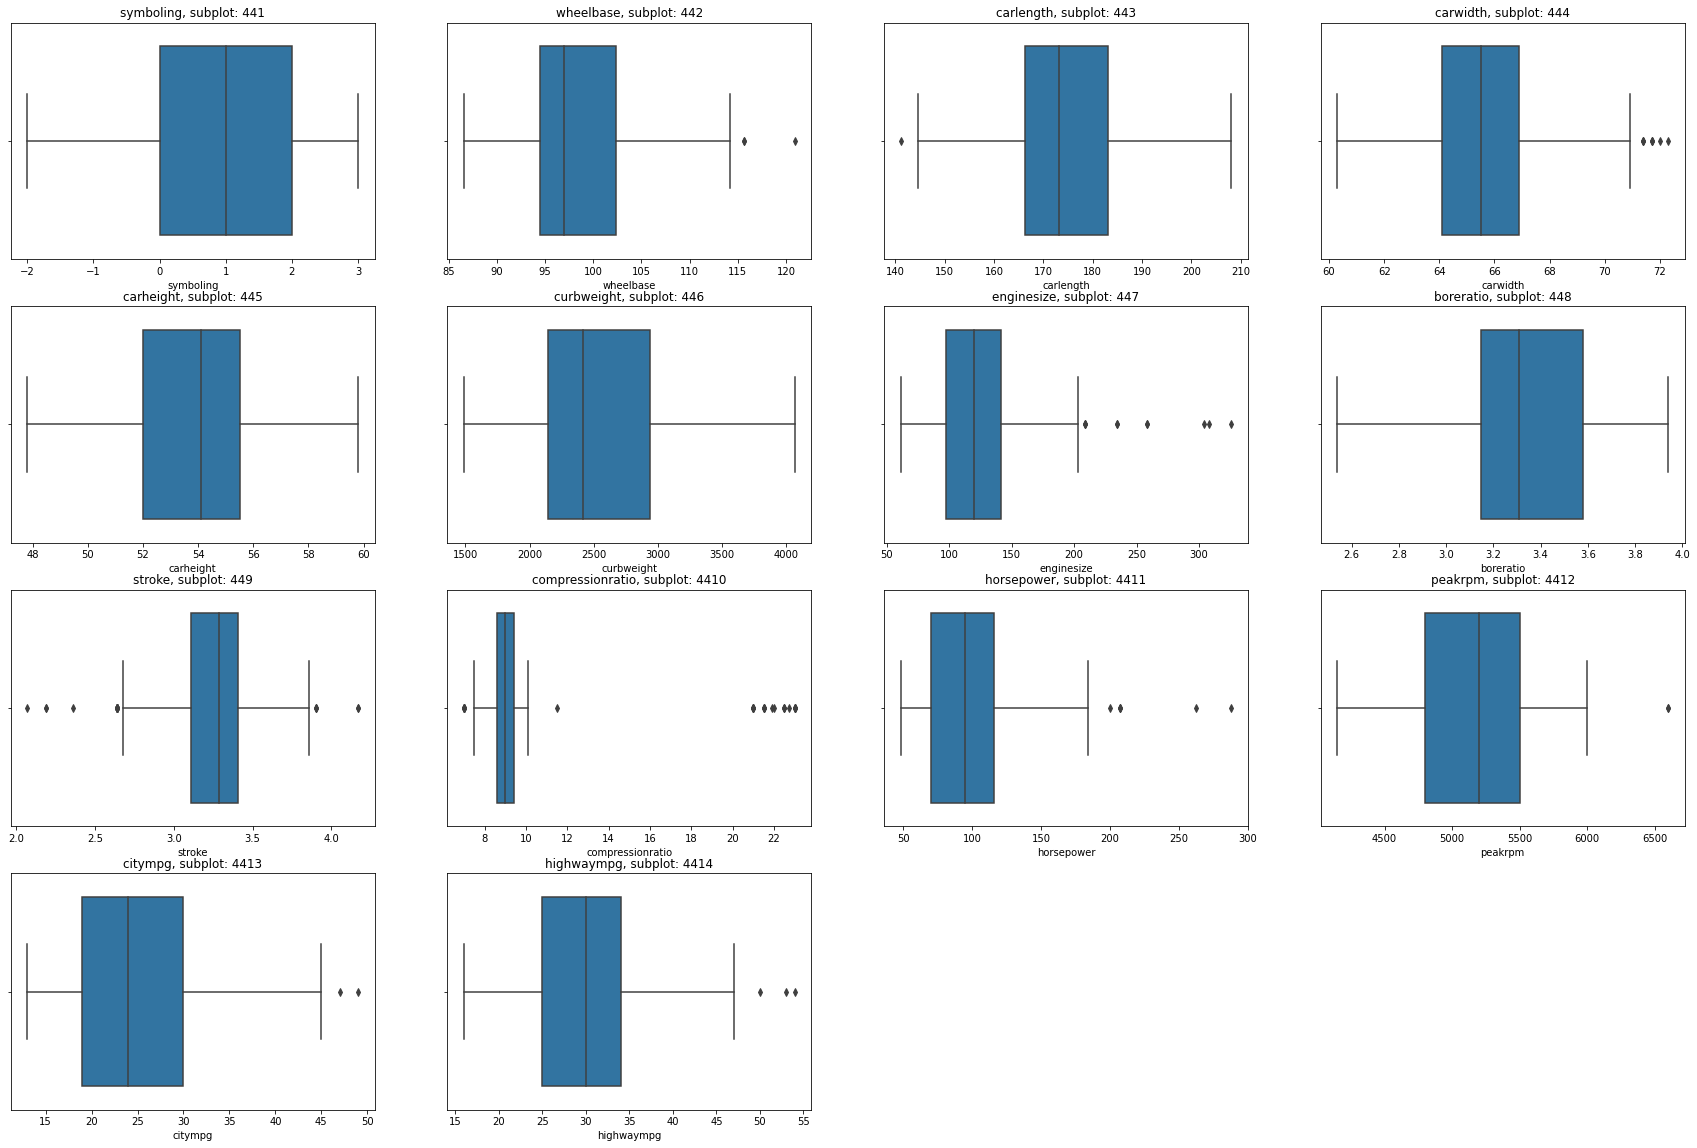

In [18]:
def show_boxplot(data):
    cols = data.columns
    a = 4 # no of rows
    b= 4 # no of columns
    c = 1 # initialize plot counter
    fig = plt.figure(figsize=(30,20))
    for i in cols:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(data[i])
        c = c + 1
show_boxplot(data1[numerical])

## OUTLIER DETECTION AND REMOVAL

Find Q1, Q3 and IQR od all numerical column and then by using it we weill set the outliers.

In [19]:

dict_IQR = {}
dict_Q1 = {}
dict_Q3 = {}
for i in data1[numerical]:
    Q1=data1[i].quantile(0.25)
    Q3=data1[i].quantile(0.75)
    IQR=Q3-Q1
    dict_Q1[i] = Q1
    dict_Q3[i] = Q3
    dict_IQR[i]=IQR

In [20]:
print(" The Q1 of numerical data is, ",  dict_Q1 ,"\n")
print(" The Q3 of numerical data is, ",  dict_Q3 ,"\n")
print(" The IQR of numerical data is, ",  dict_IQR ,"\n")

 The Q1 of numerical data is,  {'symboling': 0.0, 'wheelbase': 94.5, 'carlength': 166.3, 'carwidth': 64.1, 'carheight': 52.0, 'curbweight': 2145.0, 'enginesize': 97.0, 'boreratio': 3.15, 'stroke': 3.11, 'compressionratio': 8.6, 'horsepower': 70.0, 'peakrpm': 4800.0, 'citympg': 19.0, 'highwaympg': 25.0} 

 The Q3 of numerical data is,  {'symboling': 2.0, 'wheelbase': 102.4, 'carlength': 183.1, 'carwidth': 66.9, 'carheight': 55.5, 'curbweight': 2935.0, 'enginesize': 141.0, 'boreratio': 3.58, 'stroke': 3.41, 'compressionratio': 9.4, 'horsepower': 116.0, 'peakrpm': 5500.0, 'citympg': 30.0, 'highwaympg': 34.0} 

 The IQR of numerical data is,  {'symboling': 2.0, 'wheelbase': 7.900000000000006, 'carlength': 16.799999999999983, 'carwidth': 2.8000000000000114, 'carheight': 3.5, 'curbweight': 790.0, 'enginesize': 44.0, 'boreratio': 0.43000000000000016, 'stroke': 0.30000000000000027, 'compressionratio': 0.8000000000000007, 'horsepower': 46.0, 'peakrpm': 700.0, 'citympg': 11.0, 'highwaympg': 9.0}

In [21]:
for i in data[numerical]:
    data1[i] = np.where(data1[i] < (dict_Q1[i] - 1.5* dict_IQR[i]) , (dict_Q1[i] - 1.5* dict_IQR[i]) , data1[i])
    data1[i] = np.where(data1[i] > (dict_Q3[i] + 1.5* dict_IQR[i]) , (dict_Q3[i] + 1.5* dict_IQR[i]) , data1[i])

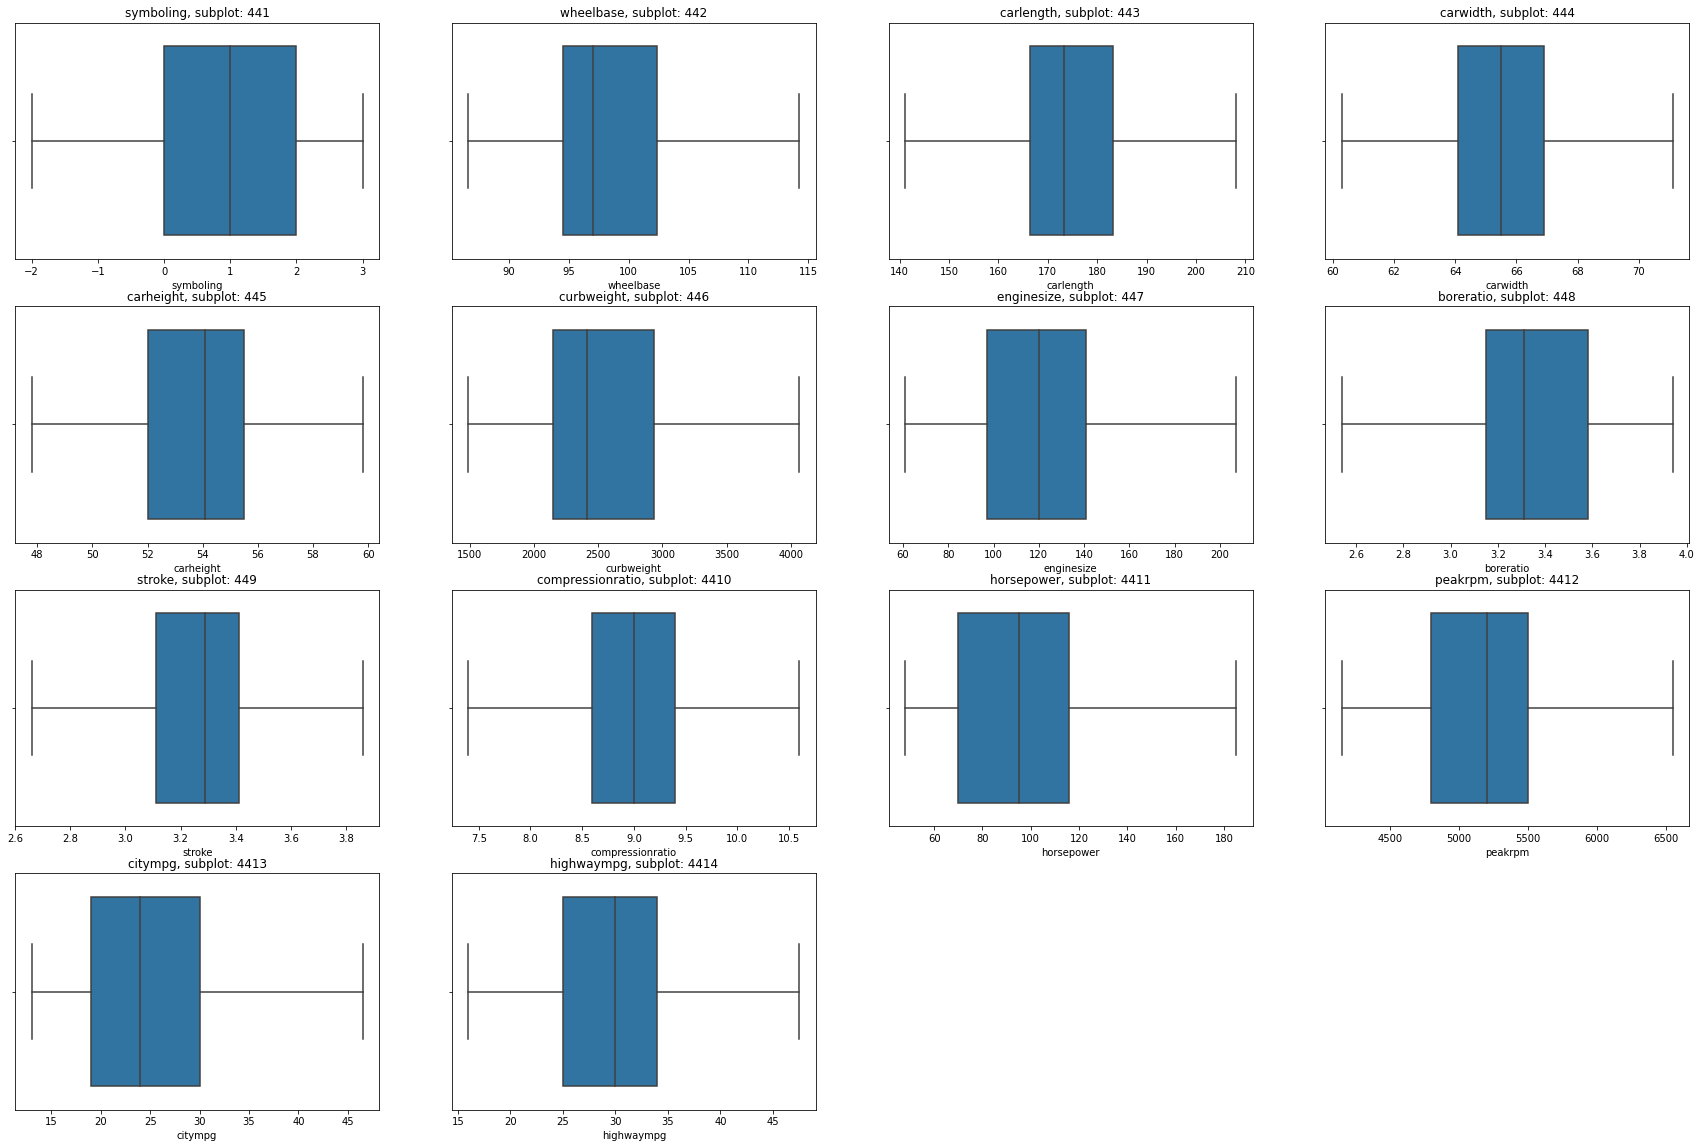

In [22]:
show_boxplot(data1[numerical])

## Checking For MultiCollinearity

In [23]:
corr_matrix_num = data[numerical].corr()

<AxesSubplot:>

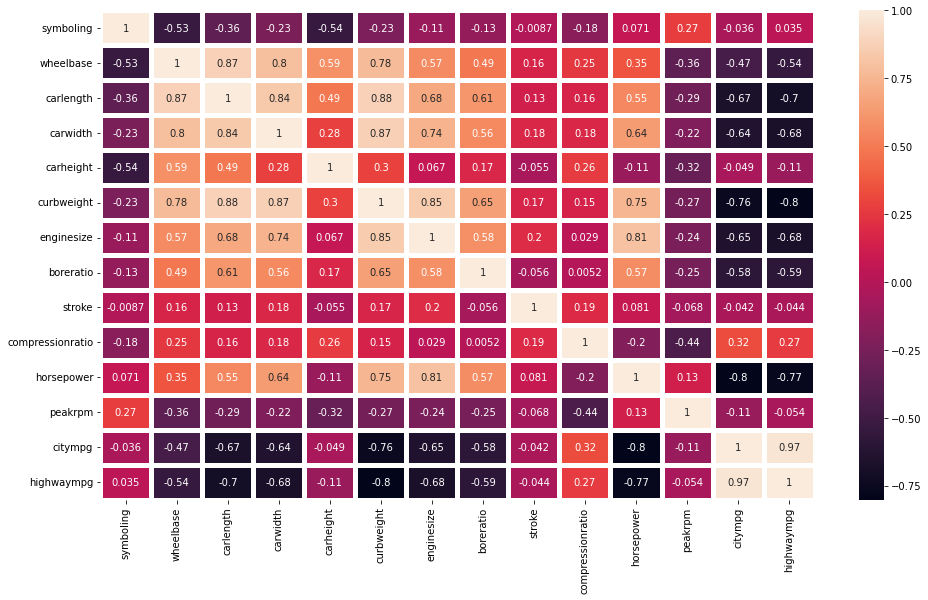

In [24]:
f,ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_matrix_num, annot=True, linewidths = 5)

No multi collinear columns are found so we can not delete any column

## Feature Selection For Numerical Columns

In [25]:
data_y = data1['price']

In [26]:
datanum  = pd.merge(data_y,data1[numerical], left_index=True, right_index = True)

In [27]:
datanum

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,16500.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,16500.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,13950.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,17450.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,-1.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
201,19045.0,-1.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
202,21485.0,-1.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
203,22470.0,-1.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,10.6,106.0,4800.0,26.0,27.0


<AxesSubplot:>

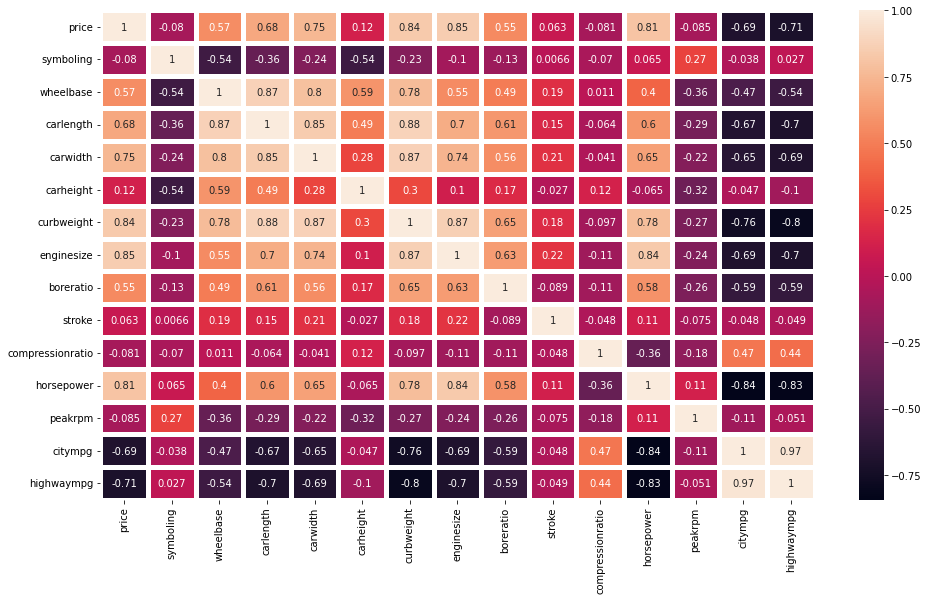

In [28]:
f,ax = plt.subplots(figsize=(16, 9))
sns.heatmap(datanum.corr(), annot=True, linewidths = 5)

In [29]:
corr_matrix = abs(datanum.corr())

<AxesSubplot:>

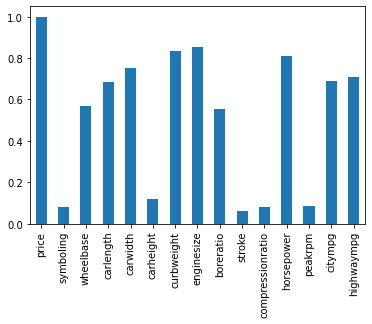

In [30]:
corr_matrix['price'].plot.bar()

In [31]:
unimportant_feature = ['symboling','carheight','stroke','compressionratio','peakrpm']
for i in unimportant_feature:
    del data1[i]

## FOR Catagorical Features

In [32]:
data1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Audi
4,gas,std,four,sedan,fwd,front,ohc,five,mpfi,Audi


In [33]:
df2 = pd.get_dummies(data1, columns=categorical, drop_first=True)
df2.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,model_Dodge,model_Honda,model_Isuzu,model_Jaguar,model_Mazda,model_Mercury,model_Mitsubishi,model_Nissan,model_Peugeot,model_Plymouth,model_Porsche,model_Renault,model_Saab,model_Subaru,model_Toyota,model_Volkswagen,model_Volvo
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,13495.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,16500.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,16500.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,13950.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,17450.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [34]:
df2['target']=df2['price']
del df2['price']

In [35]:
Y=df2['target'].values

In [36]:
del  df2['target']

In [37]:
Y.shape

(205,)

In [38]:
Y=Y.reshape(-1,1)

In [39]:
X=df2.values

In [40]:
X

array([[ 88.6, 168.8,  64.1, ...,   0. ,   0. ,   0. ],
       [ 88.6, 168.8,  64.1, ...,   0. ,   0. ,   0. ],
       [ 94.5, 171.2,  65.5, ...,   0. ,   0. ,   0. ],
       ...,
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   1. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   1. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   1. ]])

In [41]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest =train_test_split(X,Y,test_size=0.2,random_state=42 )

In [42]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (164, 58)
xtest shape  :  (41, 58)
ytrain shape :  (164, 1)
ytest shape  :  (41, 1)


## Build The Model

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(xtrain, ytrain)
# predicting the test set results 
y_pred = regressor.predict(xtest)

In [44]:
y_pred

array([[27334.52078745],
       [22725.92495721],
       [10831.64553239],
       [14291.16232067],
       [30103.92239766],
       [ 7373.30510908],
       [ 7913.4792972 ],
       [ 6634.56616419],
       [ 8854.85956327],
       [ 9255.9471443 ],
       [12600.30269465],
       [ 6707.92883551],
       [15721.81294924],
       [10196.28315988],
       [39708.45848011],
       [ 6027.5128027 ],
       [ 8351.74442383],
       [12725.3104659 ],
       [ 8777.58439486],
       [ 9471.67866996],
       [10841.83960498],
       [15209.70951003],
       [ 8834.18713881],
       [ 4168.91428146],
       [ 6567.19250444],
       [28367.31244128],
       [11481.7720477 ],
       [15146.40689025],
       [ 5853.16088099],
       [15453.42512068],
       [29556.46086379],
       [ 6631.02281234],
       [ 5188.86530466],
       [16083.43693446],
       [ 7330.72835624],
       [30072.46110441],
       [11821.7239948 ],
       [12726.09558044],
       [ 8210.20394366],
       [13435.26960509],


Text(0.5, 1.0, 'True value vs predicted value : Linear Regression')

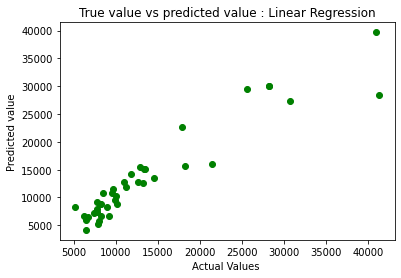

In [45]:
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Actual Values ")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression") 


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 1910.2998967487215
Mean Squared Error: 8298892.058392423
Root Mean Squared Error: 2880.779765687135


In [47]:
regressor.coef_

array([[ 2.07732644e+02, -1.12129707e+02,  6.80427721e+02,
         7.56176783e+00, -5.48724004e+01,  6.71473140e+02,
         6.53590191e+01, -4.29301334e+01,  9.00575454e+01,
        -1.09323937e+03,  1.79300369e+02, -2.43678647e+02,
        -1.67536771e+03, -2.80403044e+03, -2.89055867e+03,
        -4.12011258e+03,  5.80051641e+02,  9.84245349e+03,
        -6.65564075e+03, -2.94752797e+03,  1.22085541e+03,
         3.27088857e+03, -2.35339149e+03, -5.18220420e+03,
        -1.05339451e+04, -1.07921720e+04, -8.67926573e+03,
        -6.36646291e-12, -2.81976761e+03, -5.18220420e+03,
         1.23660203e+03,  5.02533626e+02,  1.09323937e+03,
        -6.81824403e+01,  7.97613129e+02, -6.52083381e+01,
        -1.43936506e+03, -6.74187001e+02,  3.64727498e+03,
         3.10346626e+03, -3.88261242e+03, -4.22099018e+03,
        -2.54216255e+03, -2.48090269e+03,  3.10261352e+03,
        -2.97393127e+03, -7.82228117e+03, -4.61558324e+03,
        -2.50020548e+03, -2.94752797e+03, -4.07732921e+0

In [48]:
model.score(xtrain,ytrain)

0.9707439126096904

In [49]:
df = pd.DataFrame({'Actual':ytest.flatten(), 'Predicted':y_pred.flatten().round(2)})

In [50]:
df

,Actual,Predicted
0,30760.000,27334.52
1,17859.167,22725.92
2,9549.000,10831.65
3,11850.000,14291.16
4,28248.000,30103.92
5,7799.000,7373.31
6,7788.000,7913.48
7,9258.000,6634.57
8,10198.000,8854.86
9,7775.000,9255.95


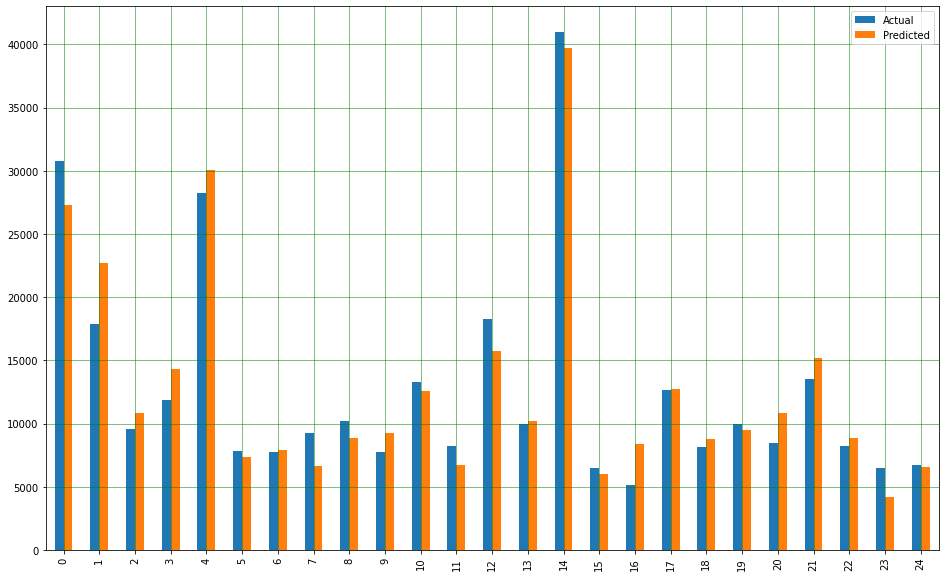

In [51]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()